In [11]:
# 1. The Data: This dataset contains sentences labelled with positive or negative sentiments

In [1]:
# to have a good overview over the inputs, all are stored at the beginning

import matplotlib.pyplot as plt
import pandas as pd
import os

import nltk
import helpers.data_mining_helpers as dmh
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.io as pio


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# 2. Data Peparation Data Import


here = os.path.dirname("C:/Users/Feli/Documents/NTHU/DataMining/Lab/DMLab1/NewDataset") if "__file__" in locals() else "."

files = [("amazon", "C:/Users/Feli/Documents/NTHU/DataMining/Lab/DMLab1/NewDataset/sentiment labelled sentences/amazon_cells_labelled.txt"),
         ("imdb", "C:/Users/Feli/Documents/NTHU/DataMining/Lab/DMLab1/NewDataset/sentiment labelled sentences/imdb_labelled.txt"),
         ("yelp", "C:/Users/Feli/Documents/NTHU/DataMining/Lab/DMLab1/NewDataset/sentiment labelled sentences/yelp_labelled.txt")]
    
dfs = []

# 3. Data Transformation: Pandas Dataframe

for provider, name in files:
    df = pd.read_csv(name, sep="\t")
    df.columns = ["sentence", "label"]
    df["provider"] = provider
    dfs.append(df)

data = pd.concat(dfs, axis=0)

# visualization of some records in table form
print(data.head(6))
print("shape", data.shape)

                                            sentence  label provider
0                        Good case, Excellent value.      1   amazon
1                             Great for the jawbone.      1   amazon
2  Tied to charger for conversations lasting more...      0   amazon
3                                  The mic is great.      1   amazon
4  I have to jiggle the plug to get it to line up...      0   amazon
5  If you have several dozen or several hundred c...      0   amazon
shape (2745, 3)


In [3]:
# print the first three text entries
for t in data.sentence[:3]:
    print(t)

Good case, Excellent value.
Great for the jawbone.
Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!


In [4]:
# 4 Data Mining using Pandas


data.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence    (The amoung of missing records is: , 0)
label       (The amoung of missing records is: , 0)
provider    (The amoung of missing records is: , 0)
dtype: object

In [5]:
# obviously, there are no missing values in this dataset. Thus, no special treatment for missing values is necessary

# 4.1 Dealing with duplicated Data
sum(data.duplicated())

17

In [6]:
# There are 17 duplicates in the dataset. To have a closer look on them, the duplicated values are plotted:
duplicateRowsDF = data[data.duplicated(keep='last')]

duplicateRowsDF

,sentence,label,provider
17,Works great!.,1,amazon
178,If you like a loud buzzing to override all you...,0,amazon
179,Don't buy this product.,0,amazon
186,Great phone!.,1,amazon
261,Works great.,1,amazon
289,Great Phone.,1,amazon
391,This is a great deal.,1,amazon
401,Excellent product for the price.,1,amazon
445,Does not fit.,0,amazon
646,Great phone.,1,amazon


In [7]:
# These duplicates do not have additional information an can be dropped.
print("Length of dataframe with duplicated values:", len(data))

# As one entry of the multiple redundancies contains information, the first one will be kept and the other ones removed.
# So, the length of the result dataset should be reduced by 17 in comparison to the original dataset

data.drop_duplicates(keep="first", inplace=True)
print("Length of dataframe without duplicated values:", len(data))


Length of dataframe with duplicated values: 2745
Length of dataframe without duplicated values: 2728


yelp      995
amazon    989
imdb      744
Name: provider, dtype: int64


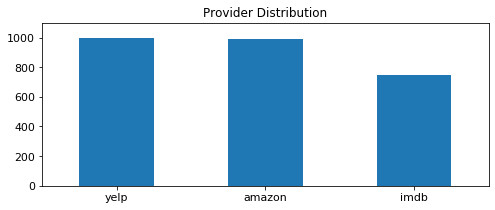

In [8]:
# Data Preprocessing
# 5.1 Data Sampling
    # As the dataset contains less than 3000 entries, no sampling is needed
    
print(data.provider.value_counts())

# plot barchart for data
data.provider.value_counts().plot(kind = 'bar',
                                    title = 'Provider Distribution',
                                    ylim = [0, 1100],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

In [9]:
# the sentence is divided in its components
data['unigrams'] = data['sentence'].apply(lambda x: dmh.tokenize_text(x))

# to vizualize the first four entries with the new attribute unigrams
data[0:4]

,sentence,label,provider,unigrams
0,"Good case, Excellent value.",1,amazon,"[Good, case, ,, Excellent, value, .]"
1,Great for the jawbone.,1,amazon,"[Great, for, the, jawbone, .]"
2,Tied to charger for conversations lasting more...,0,amazon,"[Tied, to, charger, for, conversations, lastin..."
3,The mic is great.,1,amazon,"[The, mic, is, great, .]"


In [12]:
# 5.2 Feature subset selection


count_vect = CountVectorizer()

data_counts = count_vect.fit_transform(data.sentence)

# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names()[0:10]

print(data_counts)

  (0, 1989)	1
  (0, 712)	1
  (0, 1599)	1
  (0, 4857)	1
  (1, 2019)	1
  (1, 1825)	1
  (1, 4527)	1
  (1, 2445)	1
  (2, 1825)	1
  (2, 4585)	1
  (2, 4605)	1
  (2, 767)	1
  (2, 1011)	1
  (2, 2563)	1
  (2, 2927)	1
  (2, 4522)	1
  (2, 45)	1
  (2, 2886)	1
  (2, 2749)	1
  (2, 3478)	1
  (3, 2019)	1
  (3, 4527)	1
  (3, 2864)	1
  (3, 2423)	1
  (4, 4527)	1
  :	:
  (2727, 4527)	3
  (2727, 4605)	1
  (2727, 2428)	1
  (2727, 2278)	1
  (2727, 4538)	1
  (2727, 3093)	1
  (2727, 646)	1
  (2727, 4970)	1
  (2727, 2978)	1
  (2727, 4589)	1
  (2727, 296)	1
  (2727, 2310)	1
  (2727, 3162)	1
  (2727, 2626)	1
  (2727, 1536)	1
  (2727, 4544)	1
  (2727, 4541)	1
  (2727, 784)	1
  (2727, 4626)	1
  (2727, 587)	1
  (2727, 2064)	1
  (2727, 3853)	1
  (2727, 3433)	1
  (2727, 5106)	1
  (2727, 1384)	1


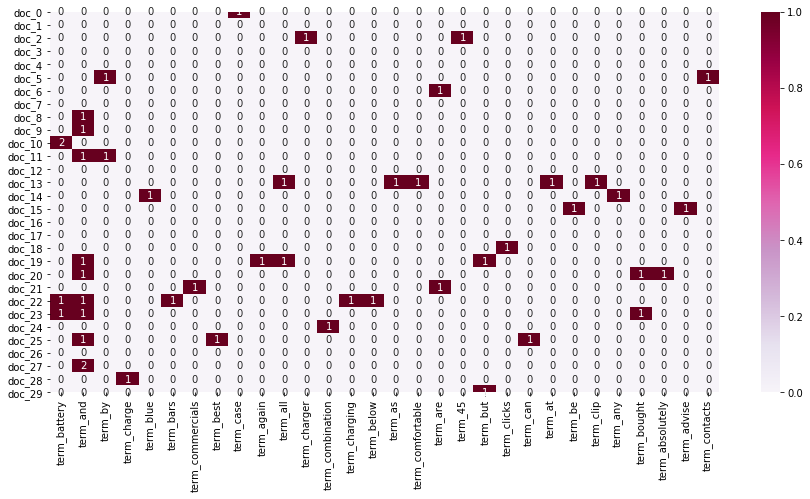

In [39]:
# 5.2 Feature subset selection



# count how many times a certain string appears
count_vect = CountVectorizer()
data_counts = count_vect.fit_transform(data.sentence)
samp = data_counts[0:30,0:1000].toarray()


plot_y = ["doc_"+ str(i) for i in list(data.index)]
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()]

# create Pandas dataframe
df_todraw = pd.DataFrame(samp, columns = plot_x[0:1000], index = plot_y[0:30])

# sort dataframe
df_todraw = df_todraw.loc[:, df_todraw.max().sort_values(ascending=False).index]


df_todraw = df_todraw.iloc[::1, 0:30]


# create heatmap from dataframe
plt.subplots(figsize=(15, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

# offers a more global but still not complete view, contains a bigger amount of data


In [40]:
# 5.3 Dimensionality Reduction

# check whether the provider can be identified through two components 

data_reduced = PCA(n_components = 2).fit_transform(data_counts.toarray())
data_reduced.shape

col = ['coral', 'blue', 'black']

categories = ['amazon', 'imdb', 'yelp']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = data_reduced[data['provider'] == category].T[0]
    ys = data_reduced[data['provider'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nCompnent 1')
ax.set_ylabel('\nComponent 2')

plt.xlim(-5, 5)
plt.ylim(-5, 5)

plt.show()
# the points are very close together and no groups can be distinguished.

(2728, 2)

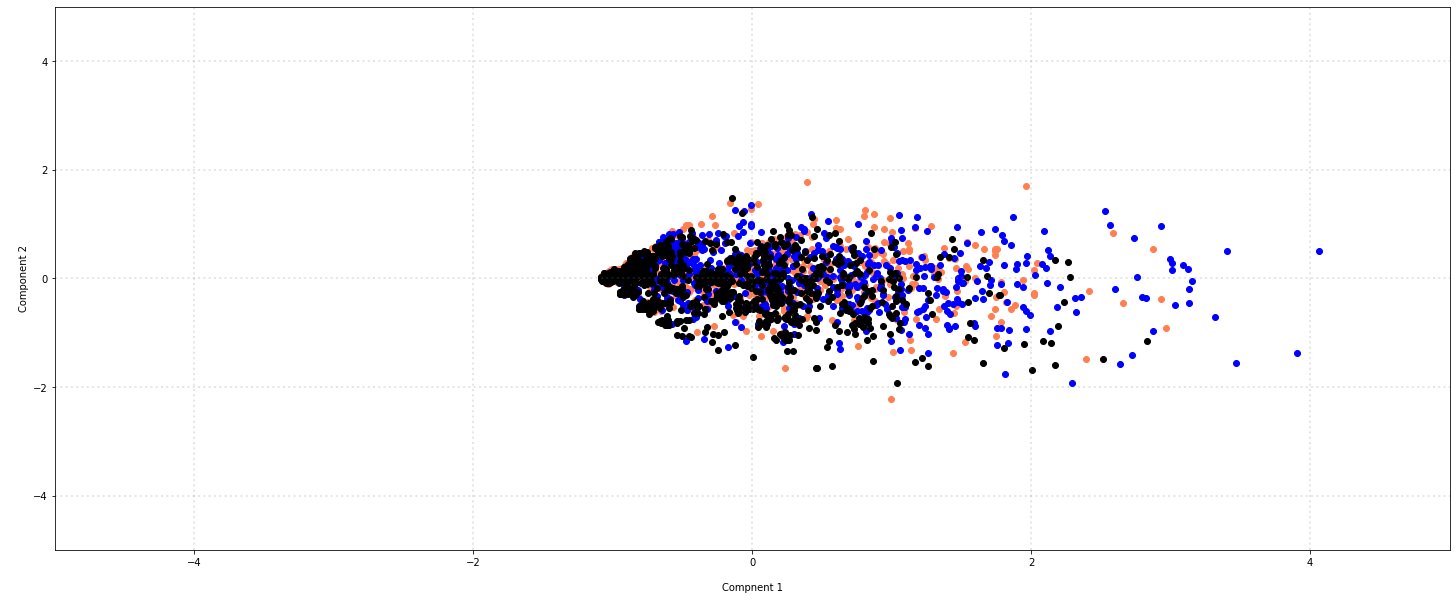

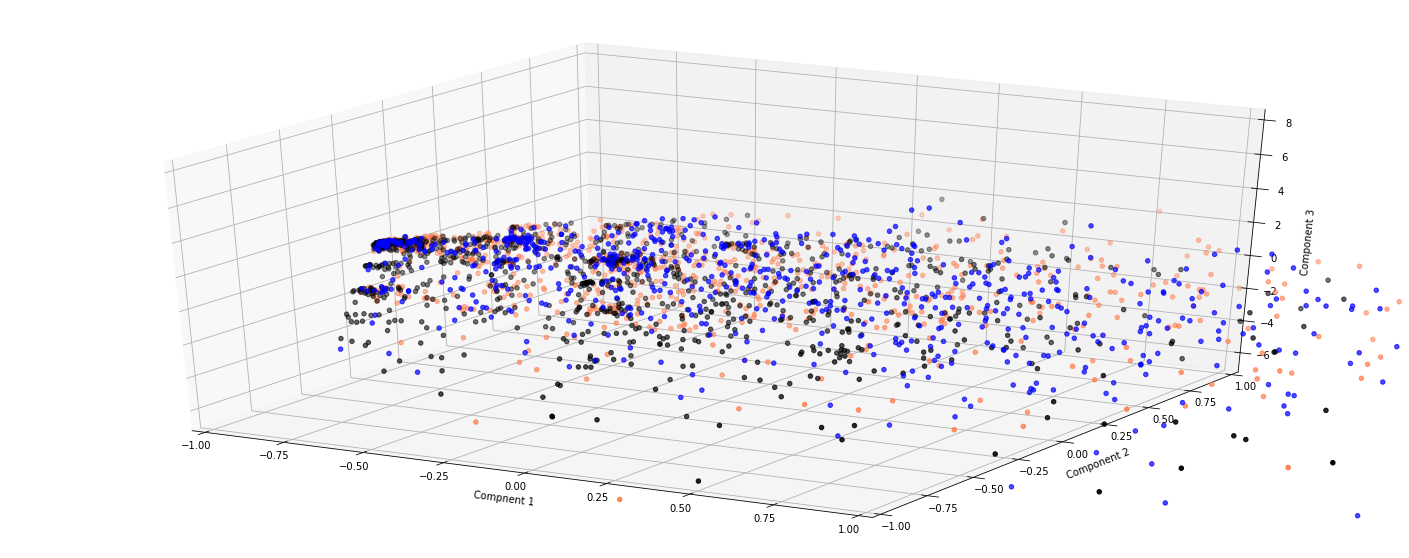

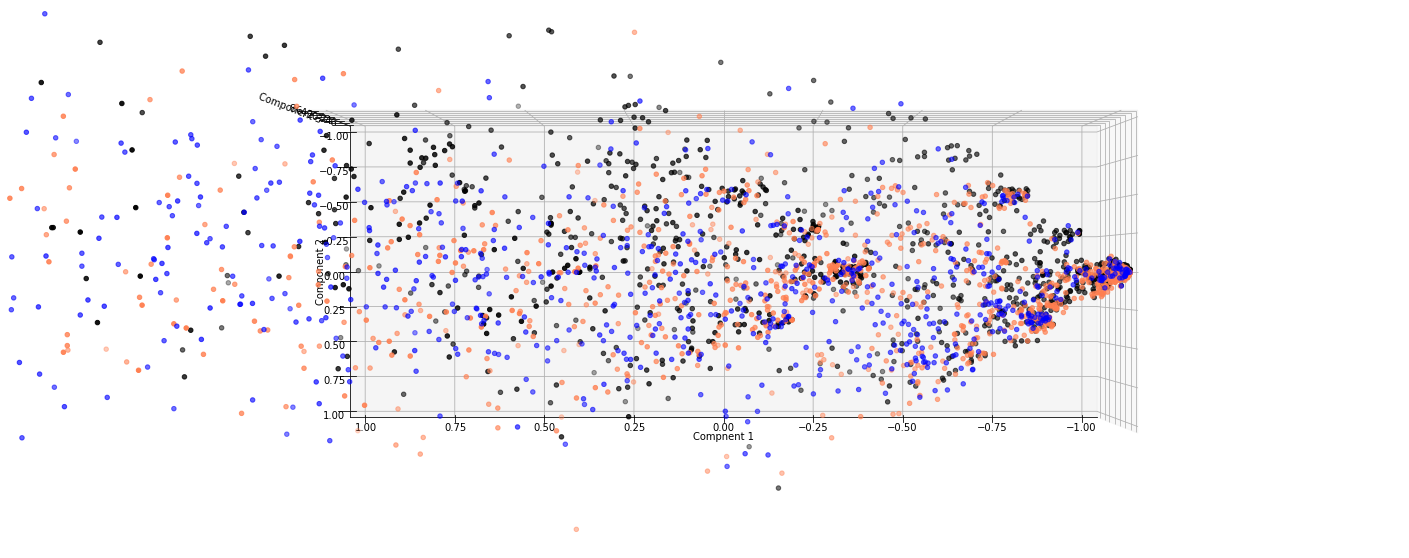

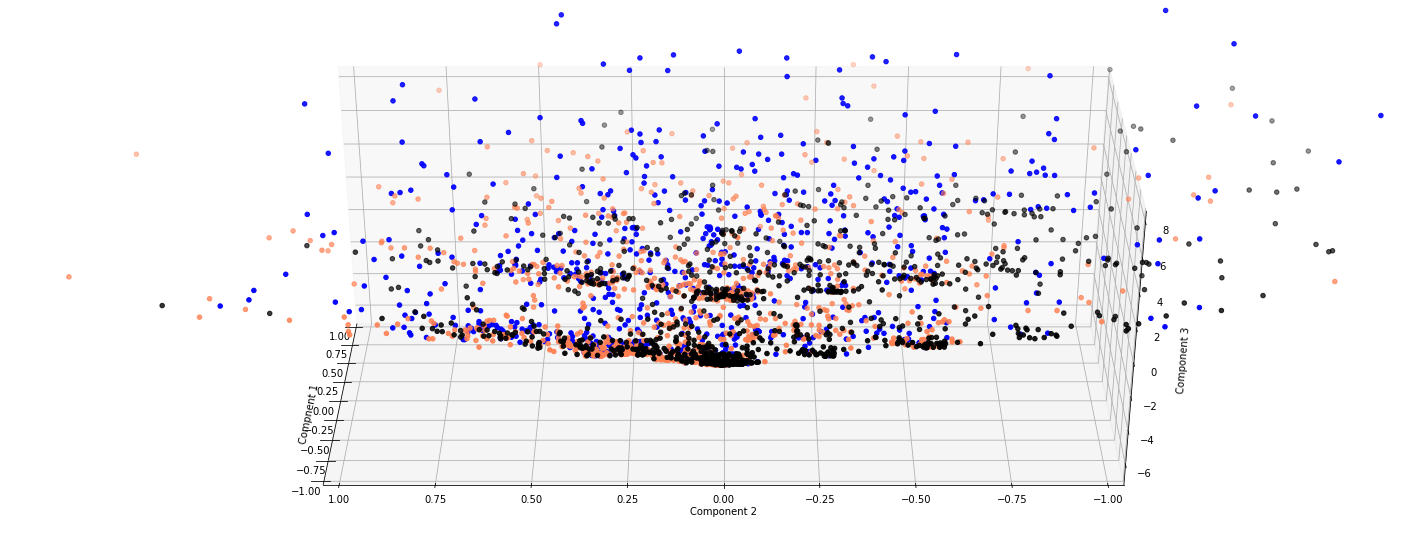

In [53]:
# check whether the provider can be identified through three components

data_reduced = PCA(n_components = 3).fit_transform(data_counts.toarray())

fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(111, projection='3d')

for c, category in zip(col, categories):
    xs = data_reduced[data['provider'] == category].T[0]
    ys = data_reduced[data['provider'] == category].T[1]
    zs = data_reduced[data['provider'] == category].T[2]

    ax.scatter(xs, ys, zs, c=c)
    
ax.set_xlabel('\nCompnent 1')
ax.set_ylabel('\nComponent 2')
ax.set_zlabel('\nComponent 3')
plt.xlim(-1, 1)
plt.ylim(-1, 1)

# elev stores the elevation angle in the z plane azim stores the azimuth angle in the x,y plane

plt.show(0)
ax.view_init(elev=90., azim=90)
plt.show(0)
ax.view_init(azim=180)
  
# according to the plots the provider cannot be identified through three components
# there are no clear groups of points with one colour
# the black ones are more concentrated than the others but for this purpose this does not help

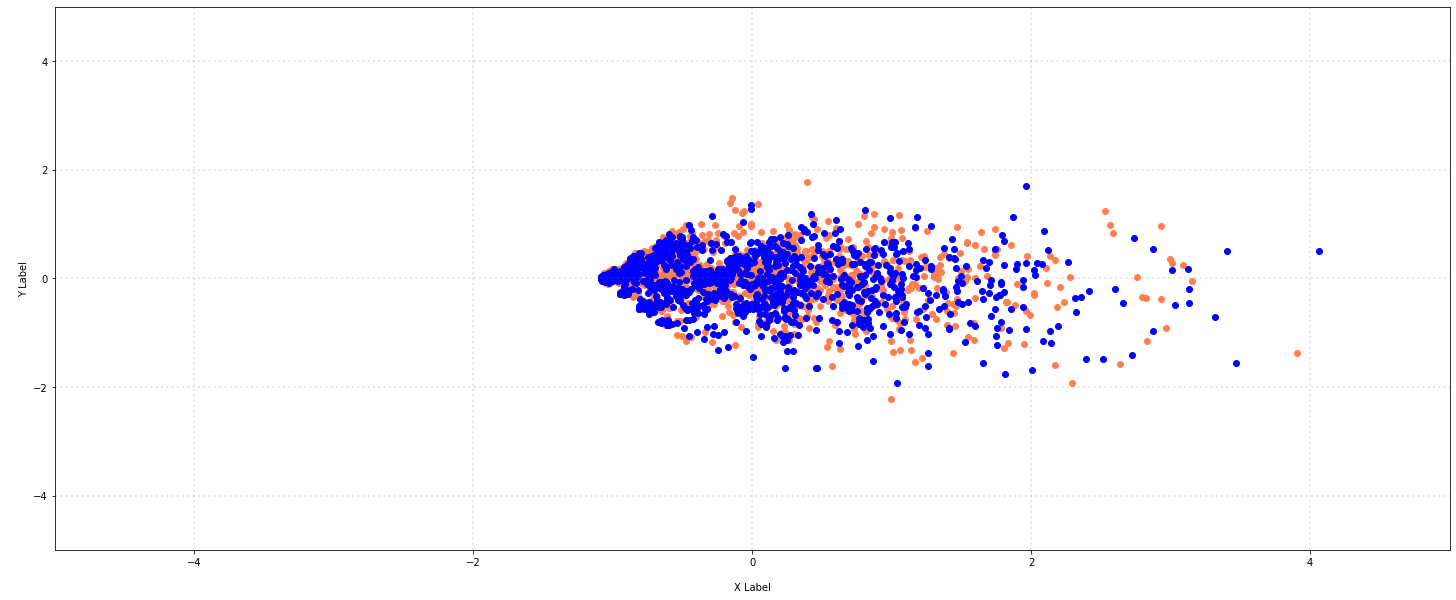

In [54]:
# check whether the label (positive or negative) can be identified through two components

col = ['coral', 'blue']

categories = [0, 1]

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = data_reduced[data['label'] == category].T[0]
    ys = data_reduced[data['label'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.xlim(-5, 5)
plt.ylim(-5, 5)

plt.show()

# there are no clear groups of points with the same colour
# thus, the label cannot be identifiet through two components

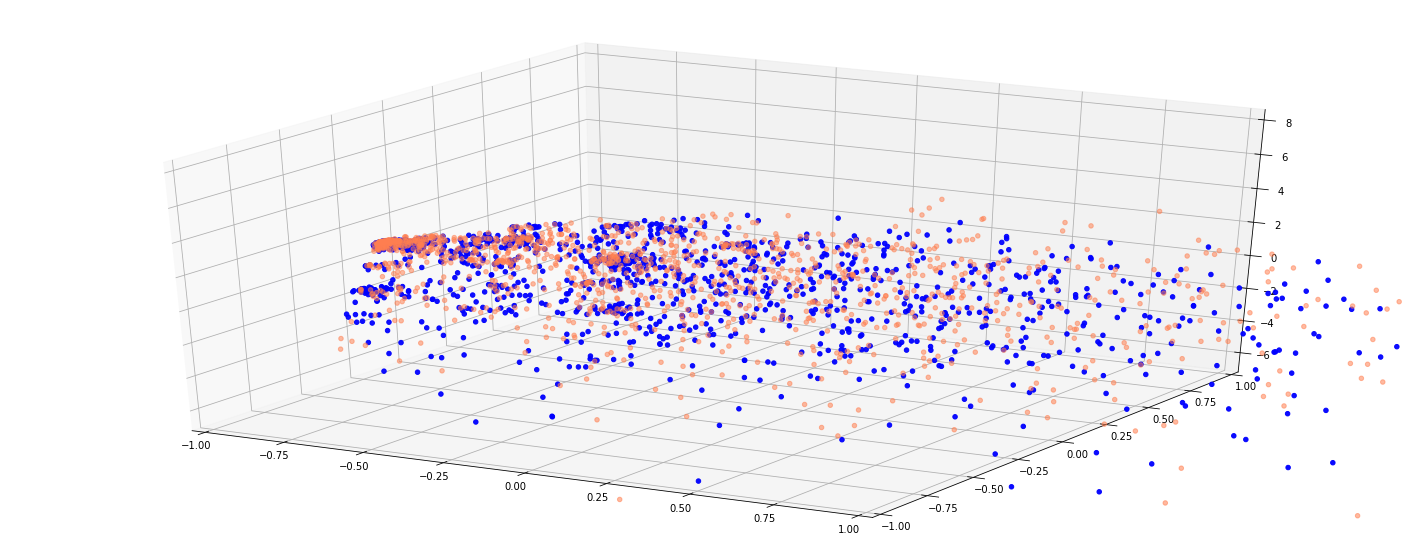

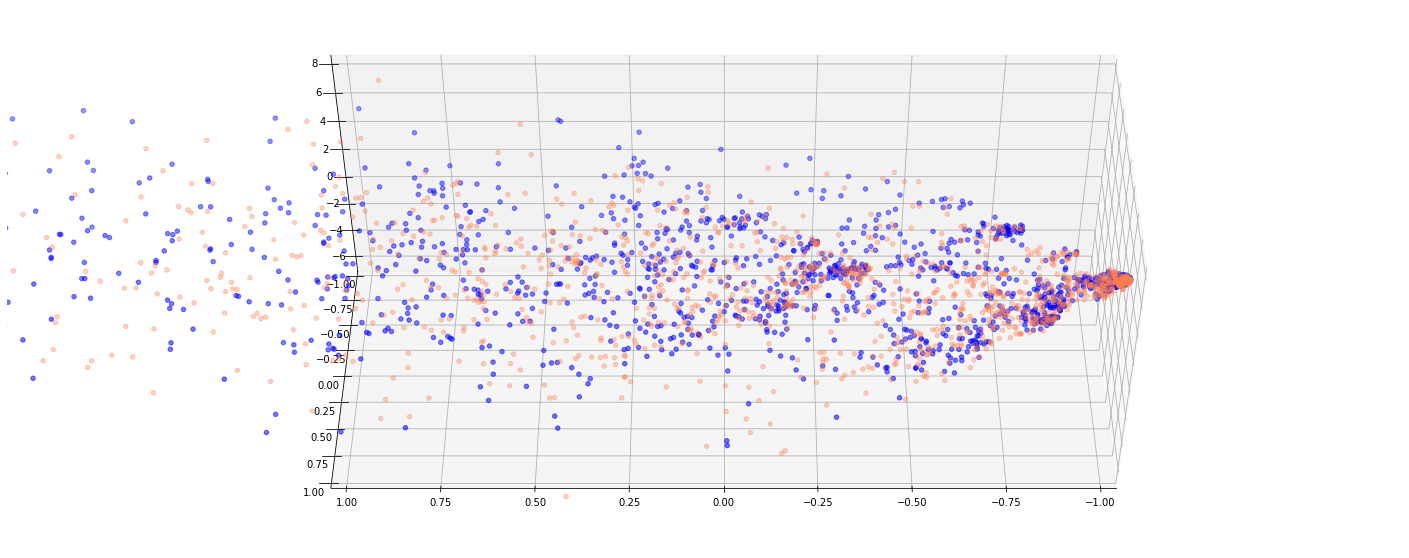

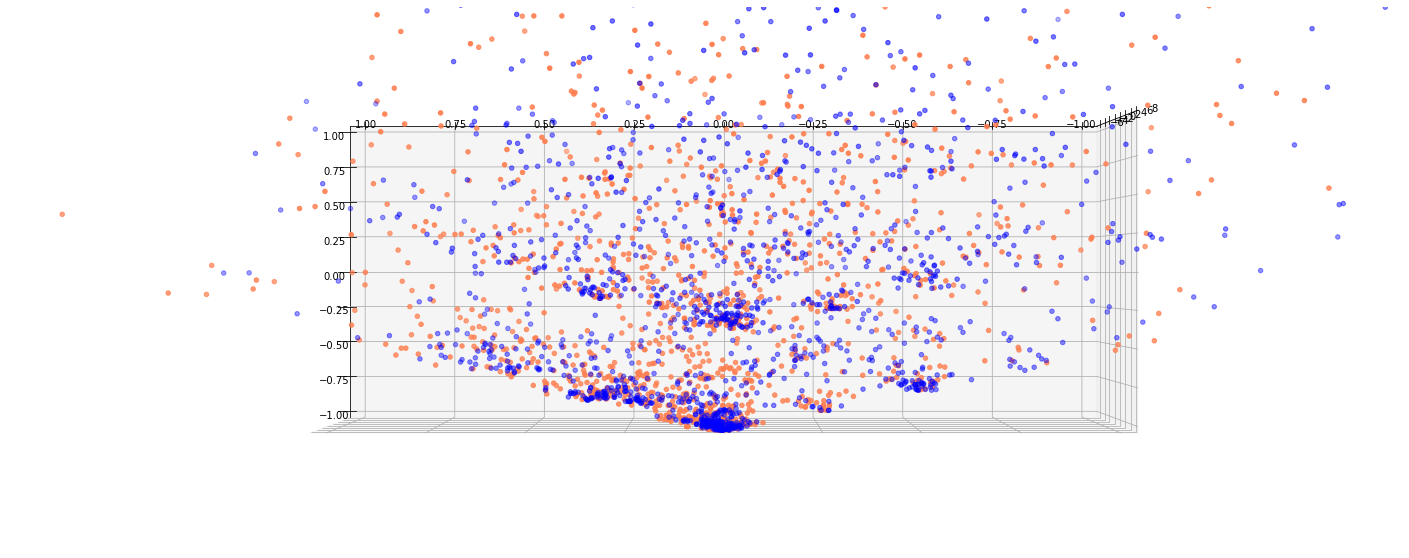

In [56]:
# check whether the label (positive or negative) can be identified through three components

data_reduced = PCA(n_components = 3).fit_transform(data_counts.toarray())
fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(111, projection='3d')

for c, category in zip(col, categories):
    xs = data_reduced[data['label'] == category].T[0]
    ys = data_reduced[data['label'] == category].T[1]
    zs = data_reduced[data['label'] == category].T[2]

    ax.scatter(xs, ys, zs, c=c)
    
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show(0)
ax.view_init(elev=45., azim=90)
plt.show(0)
ax.view_init(elev=90., azim=180)


# there are no clear groups of points with the same colour
# thus, the label cannot be identifiet through three components

In [57]:
# 5.4 Atrribute Transformation / Aggregation
# calculation of term frequencies among all suppliers

term_frequencies = np.asarray(data_counts.sum(axis=0))[0]
y = term_frequencies
x = count_vect.get_feature_names()
df2 = pd.DataFrame({
    'x': x,
    'y': y})
df = df2.sort_values('y',ascending=False)

fig = {
    "data": [{"type": "bar",
              "x": df['x'][:20],
              "y": df['y'][:20]}],
    "layout": {"title": {"text": "Frequency Computation"},
               "xaxis": {'type': 'category'}           
              }
}


pio.show(fig)